# PREPARATION ET MODELISATION DES DONNEES

In [2]:
# Import des bibliothèques nécessaires
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


# Lecture du fichier "admissions.csv"
df = pd.read_csv('admission.csv')

# Affichage des premières lignes
df.head()


,admit,gre,gpa,rank
0,0.0,380.0,3.61,3.0
1,1.0,660.0,3.67,3.0
2,1.0,800.0,4.00,1.0
3,1.0,640.0,3.19,4.0
4,0.0,520.0,2.93,4.0


In [3]:
#Affichage des infos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    float64
 1   gre     400 non-null    float64
 2   gpa     400 non-null    float64
 3   rank    400 non-null    float64
dtypes: float64(4)
memory usage: 12.6 KB


In [4]:
# Suppression des instances contenant au moins une valeur nulle.
df = df.dropna()

In [5]:
#Calcul de la moyenne de gre par groupe admis / non admis
df[['gre', 'admit']].groupby('admit').mean()

,gre
admit,
0.0,573.186813
1.0,618.897638


Dans de nombreux cas, il convient de discrétiser les variables quantitatives pour rendre les algorithmes de Machine Learning plus efficaces.
Par exemple, nous pouvons discrétiser les âges de personnes en plusieurs catégories (15-18 ans, 18-25 ans, 25-40 ans, etc). Cette technique est très utilisée par les statisticiens pour :

Harmoniser le type des variables.
Corriger des distributions très asymétriques.
Atténuer le rôle des valeurs extrêmes.
Utiliser des techniques statistiques qui ne fonctionnent qu'avec des variables qualitatives.

In [6]:
#Discrétisation de la variable gre 
test_gre = pd.cut(x = df['gre'],
                  bins = [200, 450, 550, 620, 800],
                  labels = ['mauvais', 'moyen', 'moyen +', 'bon'])

#Croisement var admit de df et la discrétisation
pd.crosstab(df['admit'], test_gre)

gre,mauvais,moyen,moyen +,bon
admit,,,,
0.0,42,71,73,87
1.0,6,31,33,57


Analyse : Plus le résultat obtenu au GRE est élevé, plus le candidat *semble* avoir des chances d'être admis. En effet, les classes d'admis dominantes sont 'bons' et 'moyen+'.

In [7]:
#Discrétisation de la variable gpa
niveaux_notes = pd.cut(x = df['gpa'],
                       bins = [2, 2.8, 3.2, 3.6, 4],
                       labels= ['mauvais', 'moyen', 'moyen+', 'bon'])

#Croisement var admit de df et la discrétisation avec normalize pour propotions d'admissions en fonction du niveau
pd.crosstab(df['admit'], niveaux_notes, normalize='columns') # ou normalize = 1


gpa,mauvais,moyen,moyen+,bon
admit,,,,
0.0,0.8,0.757282,0.706667,0.565574
1.0,0.2,0.242718,0.293333,0.434426


Analyse : Les étudiants ayant un "bon" niveau ont plus de chances d'être admis que la moyenne (0.64 > 0.5).
Par contre, avoir un niveau "moyen" ou "moyen+" n'est pas très avantageux.

In [8]:
#Discrétisation de la variable rank
nv_rank = pd.cut(x = df['rank'],
                       bins = [0.0, 1.0, 2.0, 3.0, 4.0],
                       labels= ['rk1.0', 'rk2.0', 'rk3.0', 'rk4.0'])

pd.crosstab(df['admit'], nv_rank, normalize='columns')

rank,rk1.0,rk2.0,rk3.0,rk4.0
admit,,,,
0.0,0.459016,0.642384,0.768595,0.820896
1.0,0.540984,0.357616,0.231405,0.179104


Une fois les variables quantitatives discrétisées, il est courant de procéder à leur dichotomisation.
Dichotomiser une variable revient à transformer chaque modalité de la variable en une nouvelle variable indicatrice, indiquant si la modalité en question correspond ou non à l'individu.

In [9]:
df = df.join(pd.get_dummies(niveaux_notes, prefix='niveau'))
df = df.join(pd.get_dummies(test_gre, prefix='gre'))


In [10]:
df

,admit,gre,gpa,rank,niveau_mauvais,niveau_moyen,niveau_moyen+,niveau_bon,gre_mauvais,gre_moyen,gre_moyen +,gre_bon
0,0.0,380.0,3.61,3.0,False,False,False,True,True,False,False,False
1,1.0,660.0,3.67,3.0,False,False,False,True,False,False,False,True
2,1.0,800.0,4.00,1.0,False,False,False,True,False,False,False,True
3,1.0,640.0,3.19,4.0,False,True,False,False,False,False,False,True
4,0.0,520.0,2.93,4.0,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,620.0,4.00,2.0,False,False,False,True,False,False,True,False
396,0.0,560.0,3.04,3.0,False,True,False,False,False,False,True,False
397,0.0,460.0,2.63,2.0,True,False,False,False,False,True,False,False
398,0.0,700.0,3.65,2.0,False,False,False,True,False,False,False,True


In [11]:
df = df.join(pd.get_dummies(nv_rank, prefix='rk'))

In [12]:
df

,admit,gre,gpa,rank,niveau_mauvais,niveau_moyen,niveau_moyen+,niveau_bon,gre_mauvais,gre_moyen,gre_moyen +,gre_bon,rk_rk1.0,rk_rk2.0,rk_rk3.0,rk_rk4.0
0,0.0,380.0,3.61,3.0,False,False,False,True,True,False,False,False,False,False,True,False
1,1.0,660.0,3.67,3.0,False,False,False,True,False,False,False,True,False,False,True,False
2,1.0,800.0,4.00,1.0,False,False,False,True,False,False,False,True,True,False,False,False
3,1.0,640.0,3.19,4.0,False,True,False,False,False,False,False,True,False,False,False,True
4,0.0,520.0,2.93,4.0,False,True,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,620.0,4.00,2.0,False,False,False,True,False,False,True,False,False,True,False,False
396,0.0,560.0,3.04,3.0,False,True,False,False,False,False,True,False,False,False,True,False
397,0.0,460.0,2.63,2.0,True,False,False,False,False,True,False,False,False,True,False,False
398,0.0,700.0,3.65,2.0,False,False,False,True,False,False,False,True,False,True,False,False


In [13]:
# Séparation des données et des cibles 
data = df.iloc[:,4:13]
target = df['admit']

In [14]:
data.columns


Index(['niveau_mauvais', 'niveau_moyen', 'niveau_moyen+', 'niveau_bon',
       'gre_mauvais', 'gre_moyen', 'gre_moyen +', 'gre_bon', 'rk_rk1.0'],
      dtype='object')

In [15]:
# Décomposition des données en deux ensembles d'entraînement et de test
# par défaut l'échantillon est aléatoirement réparti

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=66) 


# Classification par régression logistique
Pour construire un modèle de classification, il faut entraîner notre modèle sur l'ensemble d'entraînement uniquement.

La régression logistique est un modèle statistique linéaire permettant d'étudier les relations entre un ensemble de variables explicatives  𝑋𝑖
  et une variable cible  𝑦
 .

Dans le cas de la classification à l'aide de la régression logistique sous Python, les algorithmes d'optimisation utilisés sont : L_BFGS (Limite_memory BFGS), SAG (Stochastic Average Gradient), Newton_cg (Newton Conjugate Gradient).

In [16]:
# Création du classifieur et construction du modèle sur les données d'entraînement
clf = linear_model.LogisticRegression(C=1.0)
clf.fit(X_train, y_train)


LogisticRegression()

# EVALUATION DU MODELE DE CLASSIFICATION

Il est alors possible de calculer la prédiction pour les données présentes dans l'ensemble de test, et construire la matrice de confusion.

In [27]:
y_pred = clf.predict(X_test)

In [28]:
# Calcul de la matrice de confusion 
# Méthode 1 : à l'aide de sklearn
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[55  5]
 [13  7]]


In [29]:
# Calcul de la matrice de confusion 
# Méthode 2 : à l'aide de pandas
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,0.0,1.0
Classe réelle,,
0.0,55,5
1.0,13,7


La matrice de confusion, ci-dessus, illustre que le nombre de bonnes classifications (sur la diagonale) est supérieur au nombre de mauvaises classifications.

Le taux de bonnes prédictions ('accuracy') d'un modèle est une métrique souvent utilisée en classification et correspond au nombre d'éléments bien classés sur le nombre total d'individus. Il peut se calculer 'à la main' où à l'aide de la méthode score du classifieur (clf).

In [33]:
# taux de bonnes prédictions du modèle.
clf.score(X_test, y_test)

0.775

Le rappel de la classe positive est aussi appelé "sensibilité" (ou taux de vrais positifs) et le rappel de la classe négative "spécificité" (ou taux de vrais négatifs)

Ces deux mesures sont à évaluer prudemment. En effet, la sensibilité et la spécificité doivent être examinées conjointement, une forte valeur de l'une d'entre elle seule ne peut être signe de la bonne performance d'un modèle.
Un modèle qui, par exemple, classe tous les éléments comme positifs aura en effet une sensibilité égale à 1 mais une spécificité nulle, et vice-versa.

In [31]:
from sklearn.metrics import classification_report

# rapport de classification de nos prédictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86        60
         1.0       0.58      0.35      0.44        20

    accuracy                           0.78        80
   macro avg       0.70      0.63      0.65        80
weighted avg       0.75      0.78      0.75        80



In [32]:
probs = clf.predict_proba(X_test)

#Vecter y-preds qui, pour chaque ligne de probs vaut 1 si la probabilité d'appartenir à la classe 1 est supérieure à 0.4, et 0 sinon.
y_preds = np.where(probs[:,1]>0.4,1,0)

#atrice de confusion entre les vrais labels de y_test et y_preds.
cm = pd.crosstab(y_test, y_preds, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm


Classe prédite,0,1
Classe réelle,,
0.0,47,13
1.0,10,10


On observe évidemment que plus le seuil de classification est bas, plus le nombre d'individus classés comme 1 augmente, la sensibilité va donc croître. A contrario, un individu est classé 0 seulement si la probabilité qu'il appartienne à cette classe est supérieure à 0.6, ce qui augmente la précision de la classe nulle mais fait décroître la spécificité.

nroc_curve()  permet de retourner un tableaux contenant les taux de faux positifs (antispécificité), un tableau des taux de vrais positifs (sensibilité), et un tableau de seuils de classification prenant des valeurs comprises entre 0 et 1. Elle prend en argument le vecteur des labels que l'on souhaite prédire, un vecteur des probabilités d'appartenir à la classe positive et l'argument pos_label, qui permet de choisir quel label est défini comme positif.

La fonction auc() du même module calcule l'aire sous la courbe lorsqu'on lui donne en arguments un vecteur de taux de faux positifs et un vecteur de même taille de taux de vrais positifs.

In [23]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, seuils = roc_curve(y_test, probs[:1], pos_label=1)
roc_auc = auc(fpr, tpr)

Courbe ROC

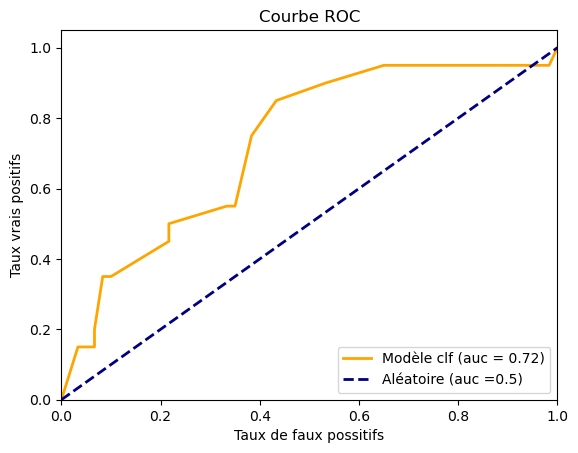

In [25]:
import matplotlib.pyplot as plt 

plt.plot(fpr, tpr, color = 'orange', lw=2, label='Modèle clf (auc = %0.2f)'% roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc =0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Taux de faux possitifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show();